In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np


data = pd.read_csv("dermatology_database_1.csv")
print(data.info())

# Step 2: Data Splitting
X = data.drop(columns=['class'])  # Assuming 'class' is the target
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace '?' with NaN and convert columns to numeric
data.replace('?', np.nan, inplace=True)

# Convert age column to numeric (since it's an object type)
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Check for missing values
print(data.isnull().sum())

# Option 1: Drop rows with missing values
data = data.dropna()



# Splitting the data into features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train & evaluate SVM
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))

# Train and evaluate for Random_Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

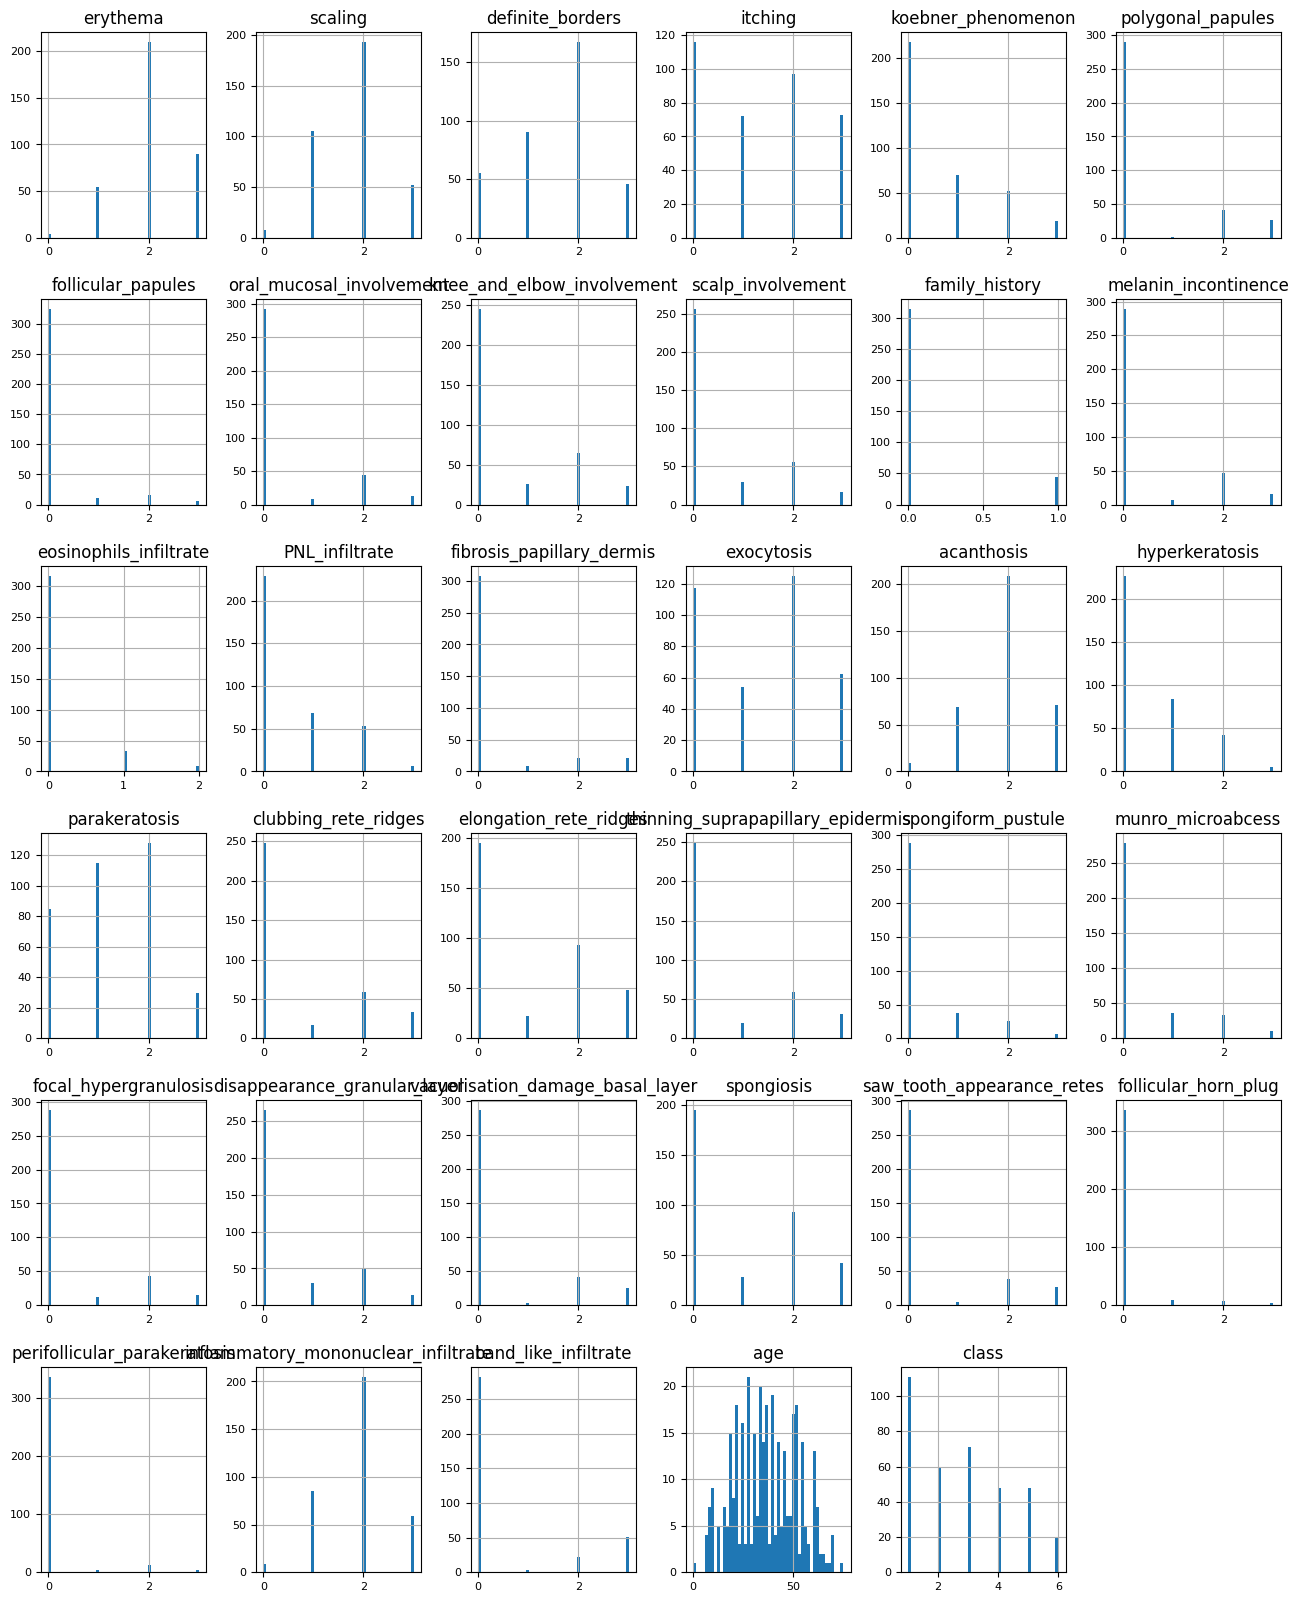

In [ ]:
import matplotlib.pyplot as plt
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()